In [5]:
import gtsam
import numpy as np

In [6]:
graph = gtsam.NonlinearFactorGraph()

In [15]:
# Add a prior on the first pose, setting it to the origin
# A prior factor consists of a mean and a noise model (covariance matrix)
ODOMETRY_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1]))
PRIOR_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.3, 0.3, 0.1]))
priorMean = gtsam.Pose3(r = gtsam.Rot3.Quaternion(1,0,0,0), t = np.array([0, 0, 0]))  # prior at origin

In [30]:
pose_count = 1
trajectory = [0,0,0,0]
for i in range(len(trajectory)-1):
    odometry = gtsam.Pose3(r = gtsam.Rot3.Quaternion(1,0,0,0), t = np.array([0,0,0]))
    graph.add(gtsam.BetweenFactorPose3(i+1, i+2, odometry,ODOMETRY_NOISE))

In [28]:
?gtsam.Pose3

Docstring:      <no docstring>
Init docstring:
__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: gtsam.gtsam.Pose3) -> None

2. __init__(self: gtsam.gtsam.Pose3, other: gtsam.gtsam.Pose3) -> None

3. __init__(self: gtsam.gtsam.Pose3, r: gtsam.gtsam.Rot3, t: numpy.ndarray[numpy.float64[3, 1]]) -> None

4. __init__(self: gtsam.gtsam.Pose3, pose2: gtsam.gtsam.Pose2) -> None

5. __init__(self: gtsam.gtsam.Pose3, mat: numpy.ndarray[numpy.float64[m, n]]) -> None
File:           ~/anaconda3/envs/slam/lib/python3.7/site-packages/gtsam/gtsam.cpython-37m-x86_64-linux-gnu.so
Type:           pybind11_type
Subclasses:     



Factor Graph:
size: 4

Factor 0: PriorFactor on 1
  prior mean: (0, 0, 0)
  noise model: diagonal sigmas[0.3; 0.3; 0.1];

Factor 1: BetweenFactor(1,2)
  measured: (2, 0, 0)
  noise model: diagonal sigmas[0.2; 0.2; 0.1];

Factor 2: BetweenFactor(2,3)
  measured: (2, 0, 0)
  noise model: diagonal sigmas[0.2; 0.2; 0.1];

Factor 3: BetweenFactor(3,4)
  measured: (2, 0, 0)
  noise model: diagonal sigmas[0.2; 0.2; 0.1];



Initial Estimate:
Values with 4 values:
Value 1: (gtsam::Pose2)
(0.5, 0, 0.2)

Value 2: (gtsam::Pose2)
(2.3, 0.1, -0.2)

Value 3: (gtsam::Pose2)
(4.1, 0.1, 0.1)

Value 4: (gtsam::Pose2)
(4.1, 0.1, 0.1)



Final Result:
Values with 4 values:
Value 1: (gtsam::Pose2)
(2.03156471e-15, 1.73822884e-15, 9.46930557e-16)

Value 2: (gtsam::Pose2)
(2, 4.18983527e-15, 1.51839165e-15)

Value 3: (gtsam::Pose2)
(4, 7.58745462e-15, 1.75897255e-15)

Value 4: (gtsam::Pose2)
(6, 1.10337199e-14, 1.77764512e-15)


X1 covariance:
[[ 9.00000000e-02 -2.55590933e-32 -1.84593452e-32]
 [-2.55590933

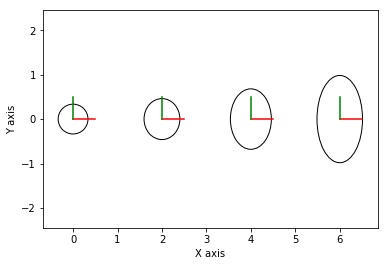

In [27]:
"""
GTSAM Copyright 2010-2018, Georgia Tech Research Corporation,
Atlanta, Georgia 30332-0415
All Rights Reserved
Authors: Frank Dellaert, et al. (see THANKS for the full author list)
See LICENSE for the license information
Simple robot motion example, with prior and two odometry measurements
Author: Frank Dellaert
"""
# pylint: disable=invalid-name, E1101

from __future__ import print_function

import numpy as np

import gtsam

import matplotlib.pyplot as plt
import gtsam.utils.plot as gtsam_plot
%matplotlib inline
# Create noise models
ODOMETRY_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.2, 0.2, 0.1]))
PRIOR_NOISE = gtsam.noiseModel.Diagonal.Sigmas(np.array([0.3, 0.3, 0.1]))

# Create an empty nonlinear factor graph
graph = gtsam.NonlinearFactorGraph()

# Add a prior on the first pose, setting it to the origin
# A prior factor consists of a mean and a noise model (covariance matrix)
priorMean = gtsam.Pose2(0.0, 0.0, 0.0)  # prior at origin
graph.add(gtsam.PriorFactorPose2(1, priorMean, PRIOR_NOISE))

# Add odometry factors
odometry = gtsam.Pose2(2.0, 0.0, 0.0)
# For simplicity, we will use the same noise model for each odometry factor
# Create odometry (Between) factors between consecutive poses
graph.add(gtsam.BetweenFactorPose2(1, 2, odometry, ODOMETRY_NOISE))
graph.add(gtsam.BetweenFactorPose2(2, 3, odometry, ODOMETRY_NOISE))
graph.add(gtsam.BetweenFactorPose2(3, 4, odometry, ODOMETRY_NOISE))
print("\nFactor Graph:\n{}".format(graph))

# Create the data structure to hold the initialEstimate estimate to the solution
# For illustrative purposes, these have been deliberately set to incorrect values
initial = gtsam.Values()
initial.insert(1, gtsam.Pose2(0.5, 0.0, 0.2))
initial.insert(2, gtsam.Pose2(2.3, 0.1, -0.2))
initial.insert(3, gtsam.Pose2(4.1, 0.1, 0.1))
initial.insert(4, gtsam.Pose2(4.1, 0.1, 0.1))
print("\nInitial Estimate:\n{}".format(initial))

# optimize using Levenberg-Marquardt optimization
params = gtsam.LevenbergMarquardtParams()
optimizer = gtsam.LevenbergMarquardtOptimizer(graph, initial, params)
result = optimizer.optimize()
print("\nFinal Result:\n{}".format(result))

# 5. Calculate and print marginal covariances for all variables
marginals = gtsam.Marginals(graph, result)
for i in range(1, 5):
    print("X{} covariance:\n{}\n".format(i, marginals.marginalCovariance(i)))

fig = plt.figure(0)
for i in range(1, 5):
    gtsam_plot.plot_pose2(0, result.atPose2(i), 0.5, marginals.marginalCovariance(i))
plt.axis('equal')
plt.show()


In [20]:
plt.show()

In [31]:
?optimizer.iterate

Docstring: iterate(self: gtsam.gtsam.NonlinearOptimizer) -> gtsam.gtsam.GaussianFactorGraph
Type:      method


In [32]:
?graph

Type:           NonlinearFactorGraph
String form:   
size: 4
           
           Factor 0: PriorFactor on 1
           prior mean: (0, 0, 0)
           noise model: diagonal sigmas[0.3; 0 <...> ctor 3: BetweenFactor(3,4)
           measured: (2, 0, 0)
           noise model: diagonal sigmas[0.2; 0.2; 0.1];
           
           
File:           ~/anaconda3/envs/slam/lib/python3.7/site-packages/gtsam/gtsam.cpython-37m-x86_64-linux-gnu.so
Docstring:      <no docstring>
Init docstring:
__init__(*args, **kwargs)
Overloaded function.

1. __init__(self: gtsam.gtsam.NonlinearFactorGraph) -> None

2. __init__(self: gtsam.gtsam.NonlinearFactorGraph, graph: gtsam.gtsam.NonlinearFactorGraph) -> None


In [40]:
a = np.array([1,2,3,4,5])

In [41]:
def fun(a,b,c):
    print(a,b,c)

In [42]:
fun(*a[:3])

1 2 3


In [44]:
b = [*a[:3],*a[3:]]

In [52]:
isam=gtsam.ISAM2(gtsam.ISAM2Params())
isam.update(graph, initial)
est=isam.calculateEstimate()

In [75]:
pose2=gtsam.Pose2(1,3,1.57)

In [78]:
delta=gtsam.Pose2(2,1,0)

In [79]:
pose2.compose(delta)

(0.00159297049, 5.00079569, 1.57)